# Workflow & Hyperparameter Optimization

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.inspection import permutation_importance


from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
import math


from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

from sklearn.linear_model import SGDRegressor, SGDClassifier

In [3]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

🏠 Import the house price data set. We will keep only numerical features for the sake of simplicity

🎯 Your goal will be to fit the best KNN Regressor. In particular, how many "neighbors" (<font color=blue>K</font> in <font color=blue>K</font>NN) should you consider to get the best predictions for your house prices ?

In [4]:
# Load raw data
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv')

# Only keep numerical columns and raws without NaN
data = data.select_dtypes(include=np.number).dropna()

data = data.reset_index(drop=True).drop(columns=['Id'])
data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1117,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1118,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1119,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [5]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

## 1. Train/Test split

❓ **Question (Holdout)**❓

👇 Split the dataset to create your `X_train` `X_test` and `y_train` `y_test`. Use:
- `test_size=0.3`
- `random_state=0` to compare your results with your buddy

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
y_train.shape

(784,)

In [8]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
95,20,75.0,9464,6,7,1958,1958,135.0,570,0,...,288,0,0,0,0,130,0,0,6,2008
113,20,120.0,10356,5,6,1975,1975,0.0,716,0,...,440,0,0,0,0,0,0,0,1,2007
737,20,60.0,7200,5,8,1950,2002,0.0,398,149,...,720,194,0,0,0,0,0,0,7,2007
37,50,48.0,12822,7,5,2003,2003,0.0,1351,0,...,670,168,43,0,0,198,0,0,8,2009
143,160,24.0,2522,7,5,2004,2004,50.0,0,0,...,380,0,40,0,0,0,0,0,5,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,30,50.0,6000,4,4,1920,1950,0.0,250,0,...,308,0,0,168,0,0,0,0,7,2007
763,60,82.0,9452,8,5,1997,1998,423.0,1074,0,...,870,0,70,0,0,0,0,0,6,2006
835,20,80.0,8800,6,6,1964,1964,425.0,553,0,...,461,0,116,0,0,0,0,700,3,2006
559,50,60.0,8172,4,6,1954,1972,0.0,0,0,...,548,0,0,0,0,156,0,0,5,2008


## 2. Scaling

⚖️ Scaling is always crucially important for the KNN algorithm..

❓ **Question (Scaling)** ❓ 

* Scale your train set and test set.
* Here, let's simply apply the `StandardScaler` and not waste time choosing one scaler per feature. Indeed, the goals of this exercise are to:
    * review KNN
    * understand GridSearchCV
    * understand RandomizedSearchCV

In [28]:
data.boxplot()

<AxesSubplot:>

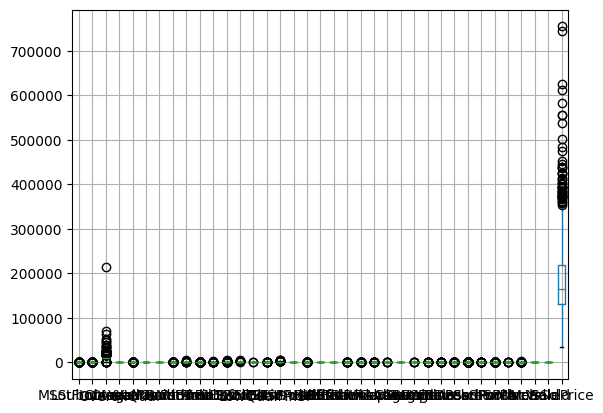

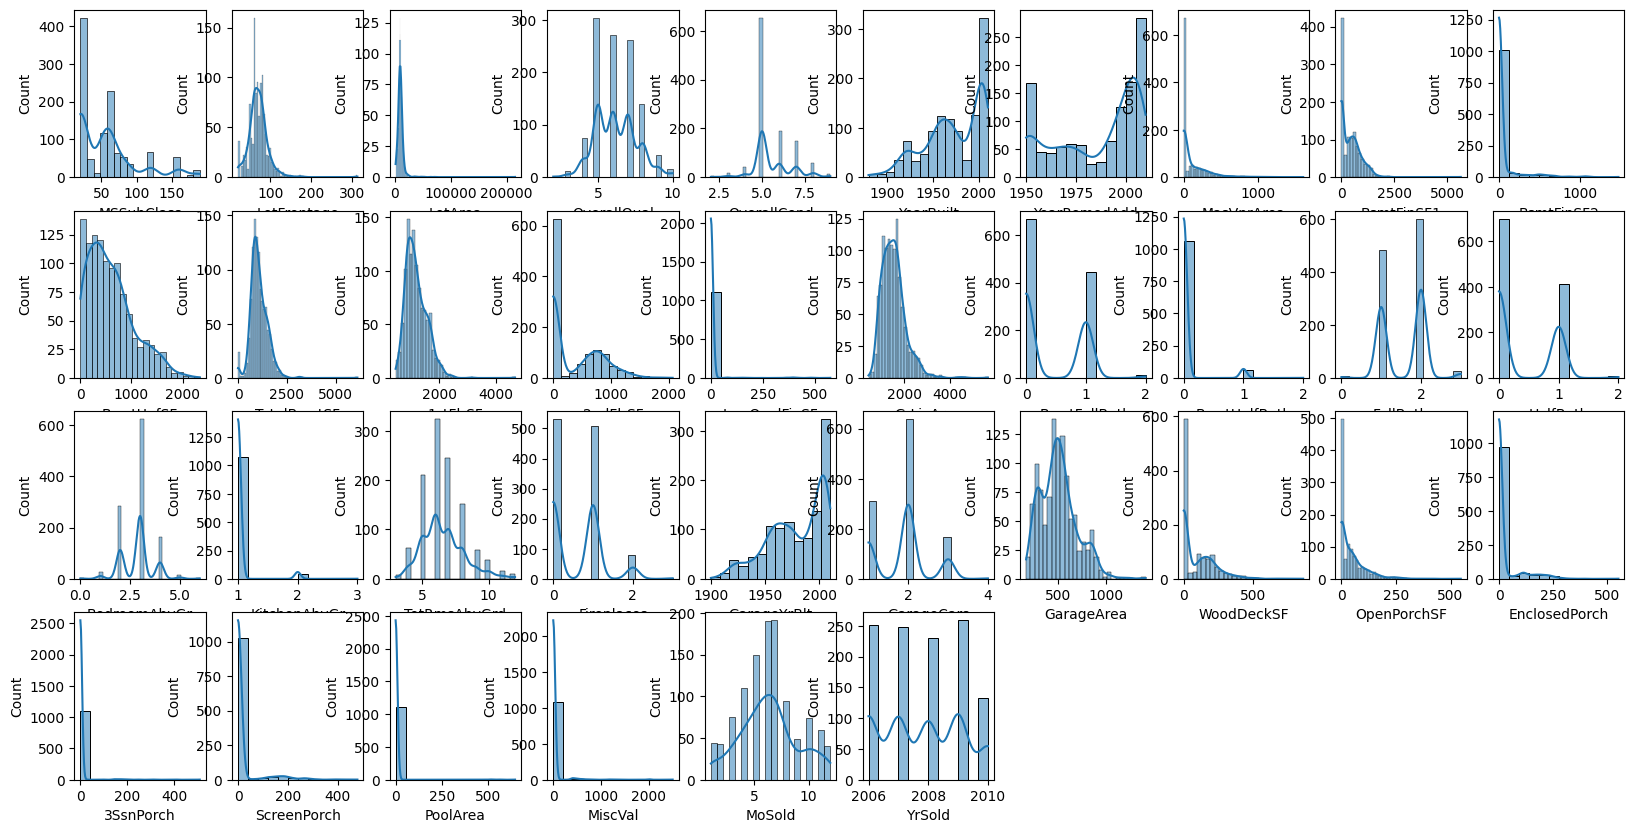

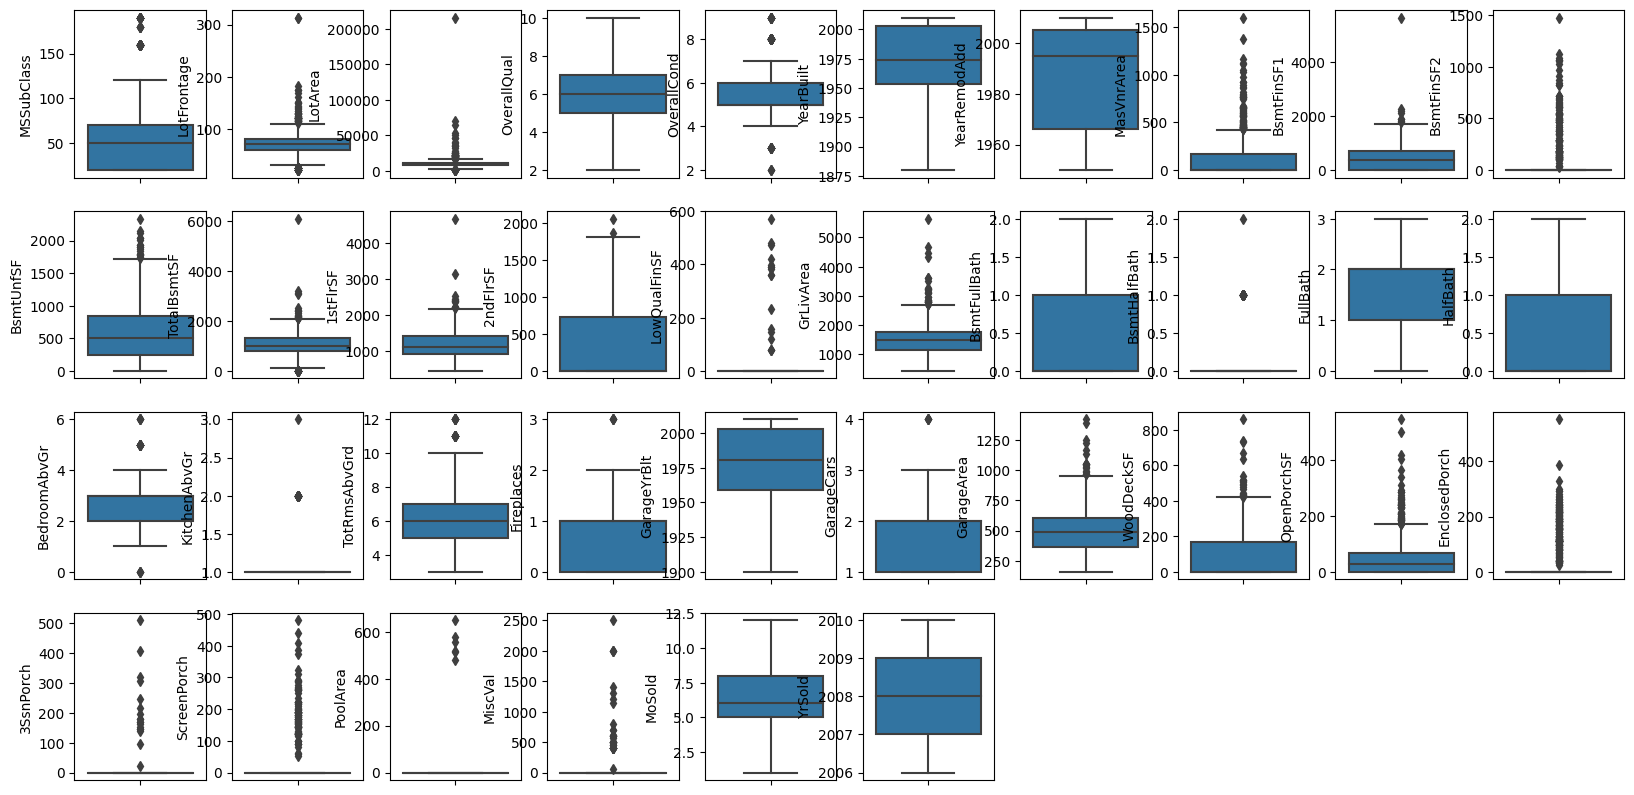

In [29]:
plt.figure(figsize=(20,10))
for i, col in enumerate(data.drop(columns='SalePrice').columns) :
    plt.subplot(4,10,i+1)
    sns.histplot(data[f'{col}'], kde=True)

plt.figure(figsize=(20,10))
for i, col in enumerate(data.drop(columns='SalePrice').columns) :
    plt.subplot(4,10,i+1)
    sns.boxplot(y=data[f'{col}'])
plt.show()

In [9]:
cols_X = X.columns

In [10]:
s_scaler = StandardScaler()

s_scaler.fit(X_train)
X_train = s_scaler.transform(X_train)
X_train = pd.DataFrame(X_train, columns = cols_X)


X_test = s_scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = cols_X)

In [11]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.878719,0.186885,-0.066635,-0.159838,1.357895,-0.445886,-1.314462,0.108204,0.326950,-0.278554,...,-1.151130,-0.738939,-0.749484,-0.372566,-0.109954,2.195993,-0.061673,-0.146085,-0.110711,0.168285
1,-0.878719,2.108009,0.117185,-0.871846,0.415780,0.093483,-0.507574,-0.584157,0.659783,-0.278554,...,-0.352925,-0.738939,-0.749484,-0.372566,-0.109954,-0.277928,-0.061673,-0.146085,-1.965356,-0.577113
2,-0.878719,-0.453490,-0.533191,-0.871846,2.300009,-0.699707,0.773954,-0.584157,-0.065154,0.776043,...,1.117452,0.830288,-0.749484,-0.372566,-0.109954,-0.277928,-0.061673,-0.146085,0.260218,-0.577113
3,-0.144006,-0.965790,0.625369,0.552169,-0.526334,0.981856,0.821418,-0.584157,2.107377,-0.278554,...,0.854884,0.619980,-0.085080,-0.372566,-0.109954,3.490043,-0.061673,-0.146085,0.631147,0.913683
4,2.549942,-1.990389,-1.497216,0.552169,-0.526334,1.013584,0.868882,-0.327727,-0.972465,-0.278554,...,-0.668006,-0.738939,-0.131434,-0.372566,-0.109954,-0.277928,-0.061673,-0.146085,-0.481640,-1.322512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,-0.633815,-0.880406,-0.780483,-1.583853,-1.468449,-1.651535,-1.694174,-0.584157,-0.402546,-0.278554,...,-1.046103,-0.738939,-0.749484,2.246670,-0.109954,-0.277928,-0.061673,-0.146085,0.260218,-0.577113
780,0.100898,0.485726,-0.069108,1.264176,-0.526334,0.791490,0.584098,1.585241,1.475907,-0.278554,...,1.905154,-0.738939,0.332103,-0.372566,-0.109954,-0.277928,-0.061673,-0.146085,-0.110711,-1.322512
781,-0.878719,0.400343,-0.203469,-0.159838,0.415780,-0.255521,-1.029678,1.595498,0.288196,-0.278554,...,-0.242647,-0.738939,1.042860,-0.372566,-0.109954,-0.277928,-0.061673,3.974984,-1.223498,-1.322512
782,-0.144006,-0.453490,-0.332885,-1.583853,0.415780,-0.572797,-0.649966,-0.584157,-0.972465,-0.278554,...,0.214220,-0.738939,-0.749484,-0.372566,-0.109954,2.690777,-0.061673,-0.146085,-0.481640,0.168285


## 3. Baseline KNN model

In [12]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,2.549942,-2.118464,-1.560069,-1.583853,-1.468449,-0.065155,-0.744894,-0.584157,-0.350113,1.653695,...,-1.161633,1.186195,-0.749484,-0.372566,-0.109954,-0.277928,-0.061673,-0.146085,0.631147,0.913683
1,0.100898,-0.538873,0.879255,0.552169,-0.526334,1.077039,0.963810,-0.584157,-0.972465,-0.278554,...,0.802371,0.069941,-0.486813,-0.372566,-0.109954,-0.277928,-0.061673,-0.146085,1.743934,-1.322512
2,-0.878719,0.186885,-0.396769,-0.159838,-0.526334,1.172222,1.106202,-0.584157,-0.910913,-0.278554,...,0.886393,-0.738939,0.826543,-0.372566,-0.109954,-0.277928,-0.061673,-0.146085,1.002076,0.913683
3,0.100898,1.553018,0.082152,0.552169,-0.526334,0.632852,0.299314,-0.584157,0.564036,-0.278554,...,0.298242,1.202373,-0.146885,-0.372566,-0.109954,-0.277928,-0.061673,-0.146085,-0.110711,1.659082
4,-0.878719,0.186885,0.030839,-0.871846,1.357895,-0.255521,0.631562,-0.584157,0.479688,-0.278554,...,-0.142871,-0.738939,-0.749484,-0.372566,-0.109954,-0.277928,-0.061673,-0.146085,-1.223498,0.913683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,-0.878719,0.101502,-0.183068,0.552169,-0.526334,1.108767,1.011274,-0.584157,-0.917752,-0.278554,...,-0.583985,0.069941,-0.285947,-0.372566,-0.109954,-0.277928,-0.061673,-0.146085,0.631147,-0.577113
333,0.835611,0.485726,-0.724842,-0.871846,0.415780,-0.731435,-1.694174,-0.584157,-0.325037,-0.278554,...,1.910405,-0.738939,-0.749484,-0.372566,-0.109954,-0.277928,-0.061673,-0.146085,0.631147,-0.577113
334,0.590707,0.186885,-0.007697,-0.871846,-0.526334,-0.160338,-0.887286,-0.584157,-0.060595,3.118807,...,-0.647001,-0.188900,-0.749484,-0.372566,-0.109954,-0.277928,-0.061673,-0.146085,1.373005,-1.322512
335,-0.878719,0.144193,-0.184510,-0.871846,1.357895,-0.604524,0.489170,-0.584157,-0.972465,-0.278554,...,-0.489460,0.846466,-0.749484,1.966037,-0.109954,-0.277928,-0.061673,-0.146085,1.373005,0.168285


❓ **Question (A baseline for our KNN)** ❓

Cross-validate (*cv = 5*) a simple KNN regressor taking into account only _the closest neighbor_, and compute the average score over the 5 folds.

In [13]:
knn_model = KNeighborsRegressor(n_neighbors=1)
cv_knn = cross_validate(knn_model, X_train, y_train, cv = 5)
cv_knn_results = cv_knn['test_score'].mean()
cv_knn_results

0.5601542887874071

## 4. GridSearch

### 4.1. A first GridSearch

❓ **Question (GridSearch v1)**❓

Let's use SKLearn `GridSearchCV` to find the best KNN hyperparameter `n_neighbors`.
- Start a coarse-grain approach, with `n_neighbors` = [1,5,10,20,50]
- 5-fold cross-validate each parameter
- Make sure to maximize your performance time using `n_jobs`

In [14]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Instantiate model
knr_model = KNeighborsRegressor()

# Hyperparameter Grid
grid ={'n_neighbors': [1,5,10,20,50]}


# Instantiate Grid Search
search = GridSearchCV(knr_model, grid, scoring = 'r2', cv = 5, n_jobs = -1)

# Fit data to Grid Search
search.fit(X_train, y_train)

CPU times: user 99.6 ms, sys: 57.1 ms, total: 157 ms
Wall time: 2.84 s


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50]}, scoring='r2')

In [15]:
search.best_score_

0.7596697382171873

In [16]:
search.best_params_

{'n_neighbors': 10}

In [17]:
type(search.best_estimator_)

sklearn.neighbors._regression.KNeighborsRegressor

In [18]:
best_tmp = search.best_estimator_

In [19]:
best_tmp.predict(X_test) - y_test

776      15000.0
921      -5071.0
395     -16116.5
1015     31157.8
511     -24500.0
          ...   
320       7388.8
711     -26184.2
627      -2860.0
677       2950.0
1016    110520.2
Name: SalePrice, Length: 337, dtype: float64

❓ **Question (best parameters)** ❓

According to the GridSearch, what is the optimal K value?

In [20]:
n_neighbors = 10

❓ **Question (scoring)** ❓ What is the best score the optimal K value produced?

In [21]:
best_score = search.best_score_

### 4.2. A second GridSearch

❓ **Question (GridSearch V2)** ❓


Now, we have an idea about where the best $K$ lies, but some of the values we didn't try could result in a  better performance.

* Re-run a GridSearch trying some values for $K$ around to your previous best value
* What are the `best_score` and `best_k` for this refined GridSearch?

In [22]:
%%time
# Instantiate model
knr_model = KNeighborsRegressor()

# Hyperparameter Grid
grid = {'n_neighbors' : np.arange(5,21)}

# Instantiate Grid Search
search = GridSearchCV(knr_model, grid, cv = 5, scoring='r2', n_jobs = -1)

# Fit data to Grid Search
search.fit(X_train, y_train)

CPU times: user 138 ms, sys: 8.93 ms, total: 147 ms
Wall time: 344 ms


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])},
             scoring='r2')

In [23]:
best_score = search.best_score_
best_score

0.7666311417513013

In [24]:
best_k = search.best_params_['n_neighbors']
best_k

16

***🧪 Test your code***

In [25]:
from nbresult import ChallengeResult
result = ChallengeResult('knn',
                         best_k=best_k,
                         best_score=best_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/fermion/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/fermion/code/albinjames/data-workflow/tests
plugins: anyio-3.6.2, dash-2.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 2 items

test_knn.py::TestKnn::test_best_k PASSED                                 [ 50%]
test_knn.py::TestKnn::test_best_score PASSED                             [100%]

============================== 2 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/knn.pickle

git commit -m 'Completed knn step'

git push origin master



### 4.3. Visual check (manual GridSearch)

☝️ This problem is actually simple enough to perform a GridSearch manually.

❓ **Question(Manual GridSearch)** ❓

- Loop manually over all values of $K$ from $1$ to $50$ and store the average of the cross-validated scores of each model in a list.
- Plot the scores as a function of $K$ to visually find the best $K$ using the `Elbow Method`

In [26]:
score_list = list()

for k in range(1, 51):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    cv_knn = cross_validate(knn_model, X_train, y_train, cv = 5,n_jobs=-1)
    cv_knn_results = cv_knn['test_score'].mean()
    score_list.append(cv_knn_results)

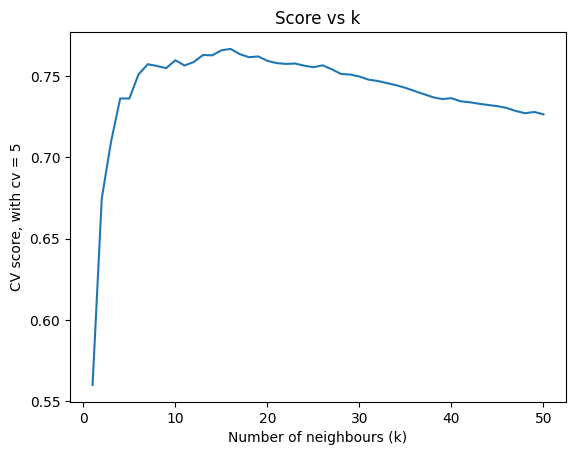

In [27]:
plt.plot(range(1, 51), score_list)
plt.xlabel("Number of neighbours (k)")
plt.ylabel("CV score, with cv = 5")
plt.title("Score vs k")
plt.show()

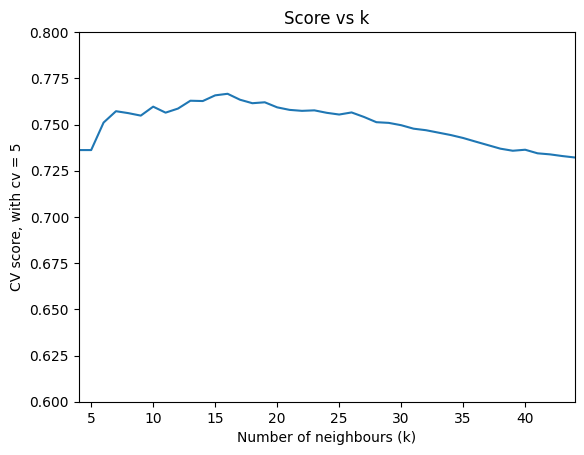

In [28]:
plt.plot(range(1, 51), score_list)
plt.xlabel("Number of neighbours (k)")
plt.ylabel("CV score, with cv = 5")
plt.title("Score vs k")
plt.xlim(4,44)
plt.ylim(0.6, 0.8)
plt.show()

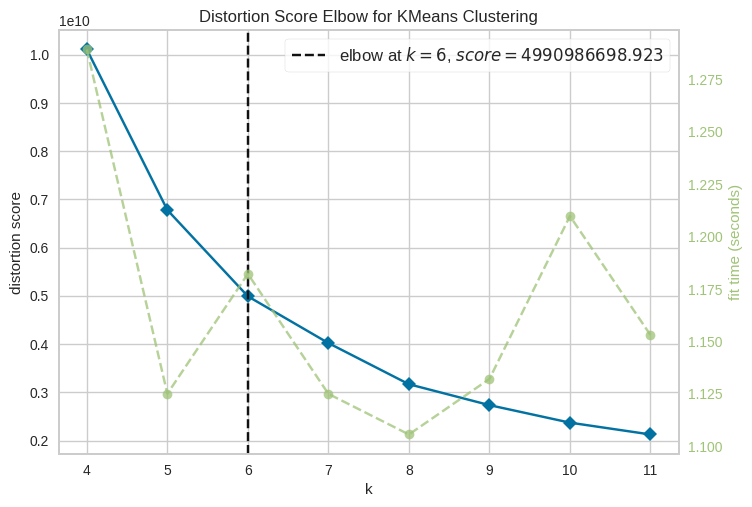

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [73]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X_tmp, y_tmp = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

❓Can you guess what makes GridSearchCV a better option than such manual loop ?


<details>
    <summary>Answer</summary>

- Sklearn's `n_jobs=-1` allows you to paralellize the search, utilizing all of your CPU cores
- What if you had multiple hyper-parameters to co-optimize?
</details>

## 5. GridSearch with multiple parameters

👩🏻‍🏫 KNNRegressor suppports various _distance metrics_ via the hyper-parameter `p` 

📚 [sklearn.neighbors.KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

❓ **Question (tuning multiple parameters)** ❓


* Use GridSearchCV to search for the best $K$ and $p$ simultaneously.
    * Try all combinations for $K = [1, 5, 10, 20, 50]$ and $p = [1, 2, 3]$. 

In [29]:
%%time
# Instantiate model
knr_model = KNeighborsRegressor()

# Hyperparameter Grid
grid = {'n_neighbors' : [1,5,10,20,50], 'p' : [1,2,3]}

# Instantiate Grid Search
search = GridSearchCV(knr_model, grid, cv = 5, scoring='r2', n_jobs = -1)

# Fit data to Grid Search
search.fit(X_train, y_train)

CPU times: user 81.8 ms, sys: 7.19 ms, total: 89 ms
Wall time: 1.03 s


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50], 'p': [1, 2, 3]},
             scoring='r2')

In [30]:
search.best_params_

{'n_neighbors': 10, 'p': 1}

In [31]:
best_score = search.best_score_
best_score

0.7969255879201194

❓ **Question (number of submodels)**❓

How many submodels did you train overall?

<details>
    <summary>Hint</summary>

Much more than 15. Think twice :)
    <details>
    <summary>Answer</summary>

75 models due to CV=5
</details>

In [34]:
number_of_submodels = 5*3*5

❓ **Question (best parameters and best score after tuning the model with multiple parameters)**❓

What are the *best parameters* and the *best score*?

In [35]:
best_k = 10
best_p = 1
best_score = best_score

## 6. Random Search

Now let's see whether a RandomizedSearch can find a better combination with the same number of models being fitted.

❓ **Question (RandomizedSearchCV)** ❓

Use `RandomizedSearchCV` to
- Randomly sample $K$ from a uniform `randint(1,50)` distribition
- Sample $p$ from a list $[1,2,3]$
- Use the correct numbers of `n_iter` and `cv` to fit the exact same numbers of models as in your previous GridSearchCV.

In [44]:
%%time
rand_model = KNeighborsRegressor()
grid = {'p': [1,2,3], 'n_neighbors': stats.randint(1,50)}
search = RandomizedSearchCV(rand_model, grid, 
                        scoring='r2',
                        n_iter=80,  # number of draws
                        cv=5, n_jobs=-1)

# Fit data to Grid Search
search.fit(X_train, y_train)
search.best_estimator_

CPU times: user 359 ms, sys: 66.7 ms, total: 425 ms
Wall time: 6.98 s


KNeighborsRegressor(n_neighbors=6, p=1)

In [45]:
search.best_score_

0.7978787384801239

In [46]:
search.best_params_

{'n_neighbors': 6, 'p': 1}

## 7. Generalization

❓ **Question (finetuning your model one more time)**❓

- Refine your RandomsearchCV if you want
- Choose your best model

In [105]:
knn_model = search.best_estimator_



In [47]:
knn_model = KNeighborsRegressor(n_neighbors=6, p = 1)

Now try to display your `cv_results` as a `DataFrame`, this will help you visualize what's going on inside the CV! 😉

In [48]:
cv_results_knn = cross_validate(knn_model, X_train, y_train, cv = 5)
cv_results_knn = pd.DataFrame(cv_results_knn)

In [49]:
cv_results_knn

,fit_time,score_time,test_score
0,0.005188,0.077603,0.719267
1,0.011448,0.057286,0.822341
2,0.008066,0.032403,0.768149
3,0.001998,0.005227,0.870533
4,0.002071,0.004732,0.809104


In [52]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003910,0.000493,0.156197,0.016627,33,3,"{'n_neighbors': 33, 'p': 3}",0.709347,0.776241,0.667876,0.751315,0.670237,0.715003,0.043187,69
1,0.003163,0.000173,0.122868,0.009196,17,3,"{'n_neighbors': 17, 'p': 3}",0.725889,0.788035,0.705242,0.776904,0.695673,0.738348,0.037491,54
2,0.003051,0.000145,0.123194,0.004177,38,3,"{'n_neighbors': 38, 'p': 3}",0.702267,0.770675,0.651875,0.746227,0.661067,0.706422,0.046395,74
3,0.003605,0.000737,0.128252,0.018006,35,3,"{'n_neighbors': 35, 'p': 3}",0.708173,0.777706,0.662240,0.751799,0.664366,0.712857,0.046168,72
4,0.003205,0.000499,0.126967,0.014753,45,3,"{'n_neighbors': 45, 'p': 3}",0.699392,0.766606,0.649305,0.736509,0.655298,0.701422,0.045448,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.002955,0.000099,0.004886,0.000060,26,2,"{'n_neighbors': 26, 'p': 2}",0.738524,0.811411,0.699374,0.800078,0.733302,0.756538,0.042518,39
76,0.002946,0.000048,0.126629,0.009778,29,3,"{'n_neighbors': 29, 'p': 3}",0.709961,0.785113,0.679591,0.759569,0.677221,0.722291,0.043227,67
77,0.003127,0.000592,0.010259,0.000352,26,1,"{'n_neighbors': 26, 'p': 1}",0.770415,0.805646,0.720335,0.814200,0.759170,0.773953,0.033853,15
78,0.003053,0.000161,0.133220,0.017389,28,3,"{'n_neighbors': 28, 'p': 3}",0.709406,0.787201,0.679492,0.763484,0.681197,0.724156,0.043771,63


❓ **Question (Evaluation of the "best" model)** ❓

* Time has come to discover our model's performance with "best params" on the **unseen** test set `X_test`.
    * Compute the r2 score for the test set and save it as `r2_test`.

In [50]:
knn_model = knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

r2_test = r2_score(y_test, y_pred)
r2_test

0.7849037111368564

❓ **Question (Taking a step back)** ❓

Would you consider the optimized model to generalize well?

<details><summary>Answer</summary>

Test score may decrease a bit with train set. Probably not more than 5%. This can be due to
- A non-representative train/test split
- A cross-val number too small leading to overfitting the model-tuning phase. The more you cross-validated, the more robust your findings will generalize - but you can't increase cv too much if your dataset is too small as you won't keep enough observations in each fold to be representative.
- Our dataset is very small and our hyperparameter optimization is thus extremely dependent (and overfitting) on our train/test split. Always make sure your dataset is much bigger than the total number of hyperparameter combinations you are trying out!
    
</details>

***🧪 Test your code***

In [51]:
from nbresult import ChallengeResult
result = ChallengeResult('r2', 
                         r2_test=r2_test)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/fermion/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/fermion/code/albinjames/data-workflow/tests
plugins: anyio-3.6.2, dash-2.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_r2.py::TestR2::test_r2 PASSED                                       [100%]

============================== 1 passed in 0.19s ===============================


💯 You can commit your code:

git add tests/r2.pickle

git commit -m 'Completed r2 step'

git push origin master



🏁 Congratulations! Now, you know how to finetune a model using either a GridSearchCV or a RandomizedSearchCV 

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!